In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from src.data.data import load_data

In [4]:
loader, _ = load_data('data', batch_size=4)

In [5]:
for item in loader:
  img_a = item['A']
  img_b = item['B']
  print(img_a.shape)
  print(img_b.shape)
  break

torch.Size([4, 3, 256, 256])
torch.Size([4, 4, 256, 256])


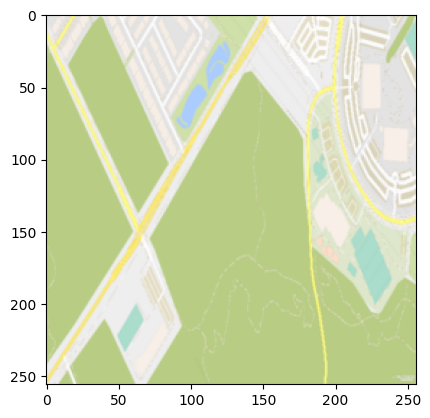

In [6]:
plt.imshow(img_a.permute(0, 2, 3, 1)[0])

In [7]:
import cv2

In [9]:
cv2.imwrite('test.png', img_a.permute((0, 2, 3, 1))[0].cpu().numpy())

True

In [11]:
from torchvision.utils import save_image

In [12]:
save_image(img_a[0], 'test.png')

In [7]:
img_b.min()

tensor(0., dtype=torch.float64)

In [8]:
from src.models.pix2pix import UnetGenerator

In [9]:
G_AB = UnetGenerator(input_nc=3, output_nc=4, num_downs=3)
G_BA = UnetGenerator(input_nc=4, output_nc=3, num_downs=3)

In [14]:
res_AB = G(img_a)
res_AB.shape

torch.Size([32, 4, 224, 224])

In [15]:
res_BA = G_BA(res_AB)
res_BA.shape

torch.Size([32, 3, 224, 224])

In [10]:
from src.models.pix2pix import NLayerDiscriminator

In [11]:
D_A = NLayerDiscriminator(input_nc=3)
D_B = NLayerDiscriminator(input_nc=4)

In [20]:
D_A(res_BA).shape

torch.Size([32, 1, 26, 26])

In [21]:
D_B(res_AB).shape

torch.Size([32, 1, 26, 26])

In [12]:
criterionGAN = nn.BCEWithLogitsLoss()

In [13]:
fake_B = G_AB(img_a)

In [23]:
res.shape

torch.Size([4, 4, 224, 224])

In [26]:
pred = D_B(fake_B)

In [27]:
labels = torch.tensor(1.0).expand_as(pred)

In [28]:
loss = criterionGAN(pred, labels)

In [29]:
loss

tensor(0.7904, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [2]:
img_batch = torch.rand((16, 3, 256, 256))
img_batch.shape

torch.Size([16, 3, 256, 256])

In [3]:
to_pil = transforms.ToPILImage()

to_pil(img_batch).shape

ValueError: pic should be 2/3 dimensional. Got 4 dimensions.

In [4]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 15.1 MB/s eta 0:00:0000:0100:01


In [5]:
!pip install scikit-image

  Using cached scikit_image-0.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
  Using cached tifffile-2023.9.26-py3-none-any.whl.metadata (30 kB)
  Using cached lazy_loader-0.3-py3-none-any.whl.metadata (4.3 kB)
Using cached scikit_image-0.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.3/313.3 kB 7.3 MB/s eta 0:00:00:00:01
Using cached lazy_loader-0.3-py3-none-any.whl (9.1 kB)
Using cached tifffile-2023.9.26-py3-none-any.whl (222 kB)


In [3]:
fake_B = np.load('samples/91/19/fake_B.npy')
real_B = np.load('samples/91/19/real_B.npy')
fake_B.shape

(256, 256, 4)

0.5331936

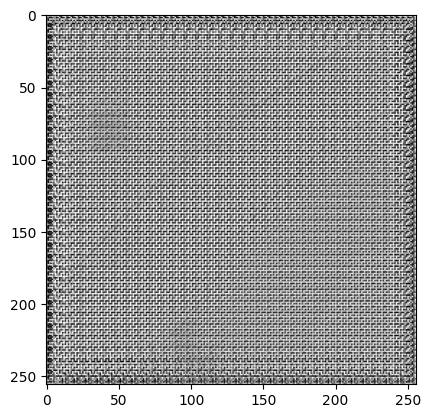

In [12]:
plt.imshow(fake_B[:, :, 1], cmap='gray')

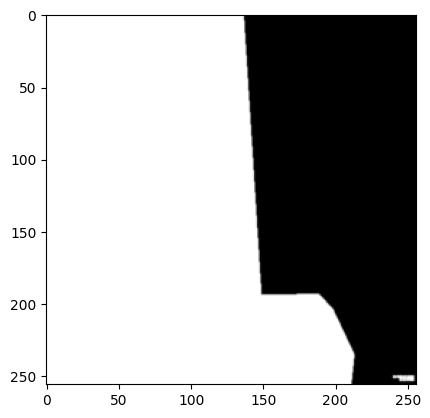

In [11]:
plt.imshow(real_B[:, :, 1], cmap='gray')

In [13]:
res = transforms.ToTensor()(real_B)

In [15]:
from torchvision.utils import save_image

In [17]:
save_image(res[2], 'test.png')

In [18]:
import os

In [19]:
os.makedirs('test/test2/test3', exist_ok=True)